In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Prepare the data (fake)

In [2]:
num_examples=5
x1=np.random.rand(1,num_examples)
x2=np.random.randn(1,num_examples)
y=3*x1+0.2*x2+5
print("x1=\n",x1)
print("_______________")
print("x2=\n",x2)
print("_______________")
print("y=\n",y)

x1=
 [[0.83488003 0.86164561 0.14054472 0.24117491 0.05546297]]
_______________
x2=
 [[ 0.0401923   0.46728083 -0.3160408   0.24723526  0.10972037]]
_______________
y=
 [[7.51267855 7.67839298 5.358426   5.77297179 5.18833298]]


In [3]:
X=np.concatenate((np.ones_like(x1),x1,x2),axis=0)
print(X)

[[ 1.          1.          1.          1.          1.        ]
 [ 0.83488003  0.86164561  0.14054472  0.24117491  0.05546297]
 [ 0.0401923   0.46728083 -0.3160408   0.24723526  0.10972037]]


## Linear regression (open-form)


In [4]:
# initialize the parameters (weights and bias)
param=np.random.randn(1,3) # [b w1 w2]
lr=1 # learning rate
iters=50
for i in range(iters):  
  # res= w1*x1 + w2*x2 + b
  # [b w1 w2][        ]
  #          [         ]
  #          [         ]
  yhat=param @ X # yhat = [res1 res2 res3 res4 ...]
  loss=np.sum((1/2*num_examples)*(yhat-y)**2,axis=1)
  print(f"loss at iter {i}:",loss, "params=",param)
  
  dparams=(yhat-y)@X.T # (1,num_examples) x (num_examples,3) = (1,3)
  param= param-lr*dparams

loss at iter 0: [477.09245771] params= [[-0.31644426  1.22673379 -0.38593146]]
loss at iter 1: [12378.22690761] params= [[30.37072752 15.5346934   3.57105599]]
loss at iter 2: [321608.576461] params= [[-125.07693517  -59.19963106  -17.40119283]]
loss at iter 3: [8356049.81112705] params= [[667.67588807 320.97036369  89.30405107]]
loss at iter 4: [2.17107316e+08] params= [[-3373.02312529 -1617.20873335  -454.58373388]]
loss at iter 5: [5.64089347e+09] params= [[17223.54314571  8262.01161303  2317.83337446]]
loss at iter 6: [1.46561984e+11] params= [[-87762.45593173 -42095.03995415 -11813.80557482]]
loss at iter 7: [3.80798103e+12] params= [[447378.41676757 214587.83720863  60218.90267497]]
loss at iter 8: [9.89391591e+13] params= [[-2280373.31333435 -1093791.37137863  -306950.4144958 ]]
loss at iter 9: [2.57064233e+15] params= [[11623684.33475704  5575356.56852799  1564606.82643367]]
loss at iter 10: [6.67905613e+16] params= [[-59248901.61009086 -28419019.24203696  -7975205.51838297]]
l

## Linear regression (closed-form)

In [5]:
X=X.T
y=y.T
print(X)

[[ 1.          0.83488003  0.0401923 ]
 [ 1.          0.86164561  0.46728083]
 [ 1.          0.14054472 -0.3160408 ]
 [ 1.          0.24117491  0.24723526]
 [ 1.          0.05546297  0.10972037]]


In [6]:
param=np.linalg.inv(X.T@X)@X.T@y
yhat=X@param
loss=np.sum((1/2*num_examples)*(y-yhat)**2,axis=0)
print(loss)

[1.38050658e-29]


In [7]:
print(param) # 5+3*x1+0.2*x2

[[5. ]
 [3. ]
 [0.2]]


## Feature engineering

In [8]:
num_bases=5

X_eng=[(x1**j)*(x2**i)for i in range(num_bases+1) for j in range(num_bases+1)]
# [(x1^0)(x2^0) (x1^1)(x2^0) (x1^2)(x2^0) (x1^0)(x2^1) ... (x1^2)(x2^2)]
X_eng=np.array(X_eng).squeeze(1)
X_eng=X_eng.T
X_eng.shape

(5, 36)

In [9]:
param=np.linalg.inv(X_eng.T@X_eng)@X_eng.T@y
yhat=X_eng@param
loss=np.sum((1/2*num_examples)*(y-yhat)**2,axis=0)
print(loss)

[13332.87905807]


## Real data

In [41]:
!pip install kagglehub

In [10]:
import kagglehub
import pandas as pd
import os
path = kagglehub.dataset_download("aariyan101/usa-housingcsv")
csv_path = os.path.join(path, "USA_Housing.csv")

C:\Users\hthek\anaconda3\envs\cudaenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
USAhousing = pd.read_csv(csv_path)
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [12]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [13]:
USAhousing=USAhousing.drop("Address",axis=1) # drop 

In [14]:
missing_values = USAhousing.isnull()
missing_values.sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X=USAhousing.drop("Price",axis=1)
y=USAhousing["Price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
X_train_np=np.array(X_train)
y_train_np=np.array(y_train)
X_test_np=np.array(X_test)
y_test_np=np.array(y_test)
print(X_train_np.shape)

(3500, 5)


## Linear regression on real data (closed-form)

In [16]:
param= np.linalg.inv(X_train_np.T @ X_train_np) @ X_train_np.T @ y_train_np
yhat= X_test_np @ param # yhat = [res1 res2 res3 res4 ...]
loss_reg=np.sum((1/2*num_examples) * (y_test_np - yhat) ** 2, axis=0)
print(loss_reg)

212909053581894.66


## Ridge regression

In [18]:
lambd=0.2
I=np.identity(num_examples)
param= np.linalg.inv(X_train_np.T @ X_train_np+ I*lambd) @ X_train_np.T @ y_train_np
yhat= X_test_np @ param # yhat = [res1 res2 res3 res4 ...]
loss_ridge=np.sum((1/2*num_examples) * (y_test_np - yhat) ** 2, axis=0)
loss_ridge

212908935140952.78

In [19]:
print(loss_reg<loss_ridge) 

False


## Using scikit-learn

In [149]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
linear_reg=LinearRegression()
ridge=Ridge()
lasso=Lasso()

In [150]:
linear_reg.fit(X_train,y_train)

yhat=linear_reg.predict(X_test)
linear_mse=mean_squared_error(y_test,yhat)
linear_mse

10568989039.20581

In [151]:
ridge.fit(X_train,y_train)
yhat=ridge.predict(X_test)
ridge_mse=mean_squared_error(y_test,yhat)
ridge_mse

10568771105.910372

In [152]:
lasso.fit(X_train,y_train)
yhat=lasso.predict(X_test)
lasso_mse=mean_squared_error(y_test,yhat)
lasso_mse

10568987763.88813

In [265]:
lasso.score(X_test,y_test)

0.9184667024614283

## Comparison

In [153]:
linear_mse>ridge_mse # ridge is better

True

In [156]:
lasso_mse>ridge_mse # ridge is better 

True

after training, we can make predictions

In [126]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1946,70125.765843,5.051254,4.765903,4.34,22063.210619
885,73433.626232,7.107789,6.227752,2.05,44544.230459
2869,63780.040152,5.044290,5.890388,4.10,32010.228110
1728,45073.895176,8.333102,4.635161,3.30,38066.161297
3043,46646.710541,6.331878,6.726796,3.45,34006.865298
...,...,...,...,...,...
1538,71112.350296,5.612677,7.419542,4.26,24134.413996
2861,74909.724224,4.225888,6.922915,2.29,40193.528715
3335,86249.993070,6.155403,7.967184,4.39,43154.838627
4736,57889.329842,5.076125,6.609567,4.00,27588.355851


In [132]:
test_example=X_test[:1]

In [135]:
print("linear regression",linear_reg.predict(test_example))
print("ridge regression",ridge.predict(test_example))
print("lasso regression",lasso.predict(test_example))

linear regression [630089.35683382]
ridge regression [630240.98570256]
lasso regression [630092.01120932]


we can do that for all examples at once

In [136]:
ridge.predict(X_test)

array([ 630240.98570256, 1560632.03839563,  778745.36949977, ...,
       1871885.98380501,  675538.40276404, 1157303.29655001])

## Feature importance

In [157]:
ridge.coef_ # weights [feature1 feature2 ...]

array([2.16905422e+01, 1.66121893e+05, 1.20769669e+05, 1.11117858e+03,
       1.52574911e+01])

<BarContainer object of 5 artists>

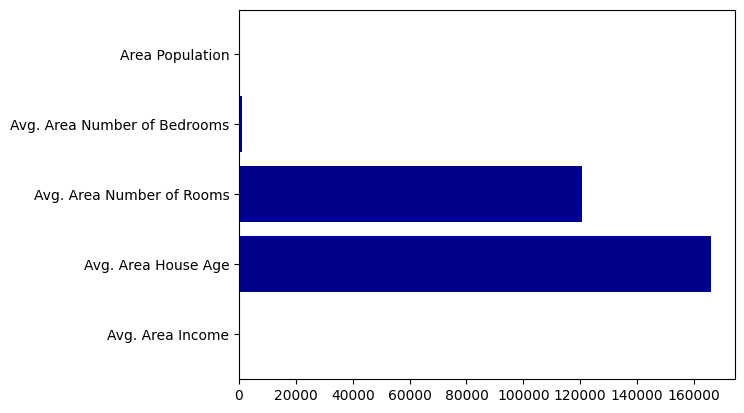

In [160]:
ridge_importance = list(zip(X.columns, ridge.coef_))

features, coefficients = zip(*ridge_importance)
plt.barh(features, coefficients, color='darkblue')

<BarContainer object of 5 artists>

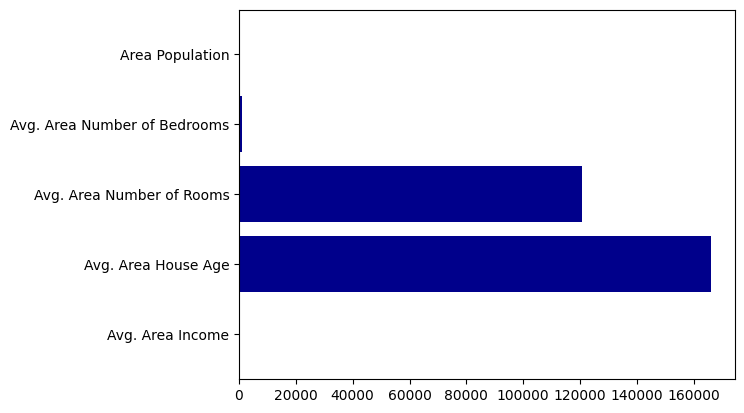

In [161]:
lasso_importance = list(zip(X.columns, lasso.coef_))

features, coefficients = zip(*lasso_importance)
plt.barh(features, coefficients, color='darkblue')

<BarContainer object of 5 artists>

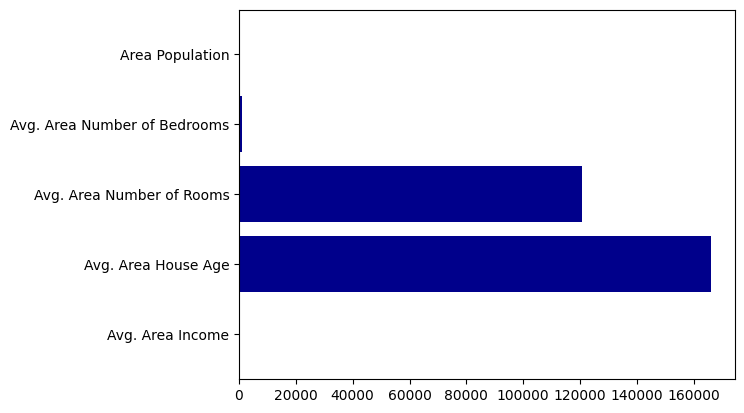

In [162]:
linear_importance = list(zip(X.columns, linear_reg.coef_))
features, coefficients = zip(*linear_importance)
plt.barh(features, coefficients, color='darkblue')

## Other models

In [137]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [138]:
tree=DecisionTreeRegressor()
rf=RandomForestRegressor()
lgb=LGBMRegressor()

In [139]:
tree.fit(X_train,y_train)
tree_score=tree.score(X_test,y_test)
tree_score

0.7560273875463748

In [140]:
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
rf_score

0.8842743825007906

In [141]:
lgb.fit(X_train,y_train)
lgb_score=lgb.score(X_test,y_test)
lgb_score

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1256
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 5
[LightGBM] [Info] Start training from score 1231827.504704


0.9005007206635787

## Random forest feature importance

<BarContainer object of 5 artists>

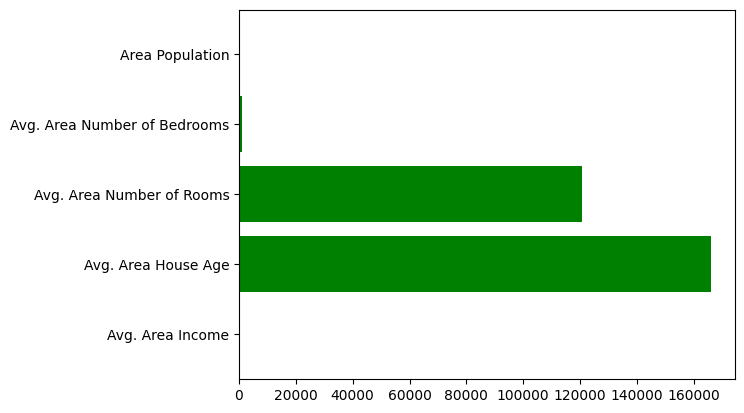

In [164]:
rf_importance = list(zip(X.columns, rf.feature_importances_))
features, coefficients = zip(*linear_importance)
plt.barh(features, coefficients, color='green')